In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:\\Users\\alokk\\1.1 Power BI\\Super Store\\SuperStore_Sales_Dataset.csv")
df.head()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,NaN,Online,NaN,NaN
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,NaN,Online,NaN,NaN
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Technology,Phones,GE 30522EE2,231.98,2,67.2742,NaN,Cards,NaN,NaN
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,NaN,Online,NaN,NaN
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,NaN,Online,NaN,NaN


In [4]:
df.shape   

(5901, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row ID+O6G3A1:R6  5901 non-null   int64  
 1   Order ID          5901 non-null   object 
 2   Order Date        5901 non-null   object 
 3   Ship Date         5901 non-null   object 
 4   Ship Mode         5901 non-null   object 
 5   Customer ID       5901 non-null   object 
 6   Customer Name     5901 non-null   object 
 7   Segment           5901 non-null   object 
 8   Country           5901 non-null   object 
 9   City              5901 non-null   object 
 10  State             5901 non-null   object 
 11  Region            5901 non-null   object 
 12  Product ID        5901 non-null   object 
 13  Category          5901 non-null   object 
 14  Sub-Category      5901 non-null   object 
 15  Product Name      5901 non-null   object 
 16  Sales             5901 non-null   float64


In [6]:
categorical_columns = df.select_dtypes("object").columns
categorical_columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Payment Mode'],
      dtype='object')

In [7]:
categorical_columns = df.select_dtypes("object").columns
categorical_columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Payment Mode'],
      dtype='object')

In [8]:
numerical_columns = df.select_dtypes(["int","float64"])
numerical_columns.shape

(5901, 7)

In [9]:
numerical_columns = df.select_dtypes(["int","float64"]).columns
numerical_columns

Index(['Row ID+O6G3A1:R6', 'Sales', 'Quantity', 'Profit', 'Returns', 'ind1',
       'ind2'],
      dtype='object')

In [18]:
round(df.isnull().sum() / len(df) * 100, 2)

Row ID+O6G3A1:R6    0.0
Order ID            0.0
Order Date          0.0
Ship Date           0.0
Ship Mode           0.0
Customer ID         0.0
Customer Name       0.0
Segment             0.0
Country             0.0
City                0.0
State               0.0
Region              0.0
Product ID          0.0
Category            0.0
Sub-Category        0.0
Product Name        0.0
Sales               0.0
Quantity            0.0
Profit              0.0
Payment Mode        0.0
Order Month         0.0
Order Quarter       0.0
Order Year          0.0
Delivery Time       0.0
dtype: float64

In [11]:
# drop Ereilevent Columns
df.drop(["ind1","ind2","Returns"],axis=1,inplace=True)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df["Order Month"] = pd.to_datetime(df["Order Date"]).dt.strftime("%B")

In [14]:
df["Order Quarter"] = pd.to_datetime(df["Order Date"]).dt.quarter.map({1: "Qtr1", 2: "Qtr2", 3: "Qtr3", 4: "Qtr4"})


In [15]:
df["Order Year"] = pd.to_datetime(df["Order Date"]).dt.year

In [16]:
# Convert date columns to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d-%m-%Y")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format="%d-%m-%Y")

# Calculate the difference in days
df["Delivery Time"] = (df["Ship Date"] - df["Order Date"]).dt.days

# Print the result
print(df["Delivery Time"])

0       6
1       5
2       5
3       2
4       5
       ..
5896    4
5897    4
5898    4
5899    4
5900    4
Name: Delivery Time, Length: 5901, dtype: int64


In [17]:
df.head(5)

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Profit,Payment Mode,Order Month,Order Quarter,Order Year,Delivery Time
0,4918,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,Online,January,Qtr1,2019,6
1,4919,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,Online,February,Qtr1,2019,5
2,4920,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Phones,GE 30522EE2,231.98,2,67.2742,Cards,February,Qtr1,2019,5
3,3074,CA-2019-125206,2019-01-03,2019-01-05,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,Online,March,Qtr1,2019,2
4,8604,US-2019-116365,2019-01-03,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,Online,March,Qtr1,2019,5


In [219]:
cont_cl = df.select_dtypes("object").columns
cont_cl

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Payment Mode', 'Order Month', 'Order Quarter'],
      dtype='object')

# Univeriate_analysis

# categorical columns

In [231]:
cont_cl = df.select_dtypes("object").columns

for j in cont_cl:
    print(f"<===={j}====>")
    print(df[j].value_counts())

<====Order ID====>
CA-2020-100111    14
CA-2020-157987    12
CA-2019-165330    11
US-2019-108504    11
CA-2019-105732    10
                  ..
CA-2020-161592     1
CA-2020-107265     1
CA-2020-140536     1
CA-2020-109211     1
CA-2020-151450     1
Name: Order ID, Length: 3003, dtype: int64
<====Order Date====>
05-09-2019    38
02-09-2020    36
10-11-2019    35
01-12-2020    34
02-12-2020    34
              ..
28-09-2019     1
31-08-2019     1
20-08-2019     1
17-08-2019     1
31-12-2020     1
Name: Order Date, Length: 643, dtype: int64
<====Ship Date====>
26-09-2020    34
21-11-2020    32
06-12-2020    32
06-09-2020    30
15-09-2020    30
              ..
02-03-2019     1
21-01-2020     1
28-02-2019     1
04-02-2020     1
22-06-2020     1
Name: Ship Date, Length: 690, dtype: int64
<====Ship Mode====>
Standard Class    3451
Second Class      1147
First Class        959
Same Day           344
Name: Ship Mode, dtype: int64
<====Customer ID====>
EP-13915    27
SV-20365    25
PP-18955   

<======Segment======>


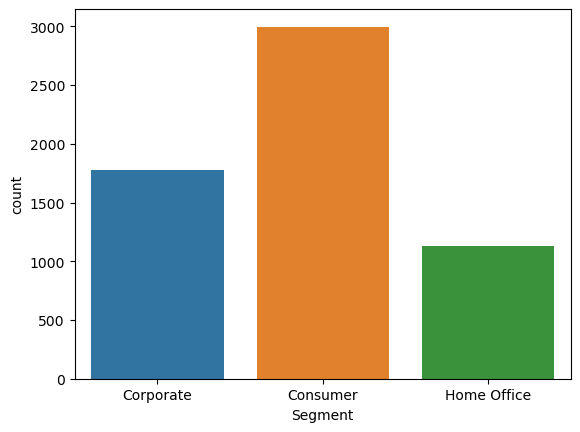

<======Ship Mode======>


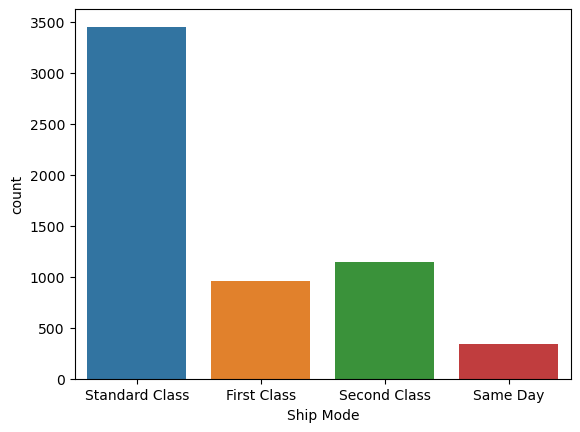

<======Region======>


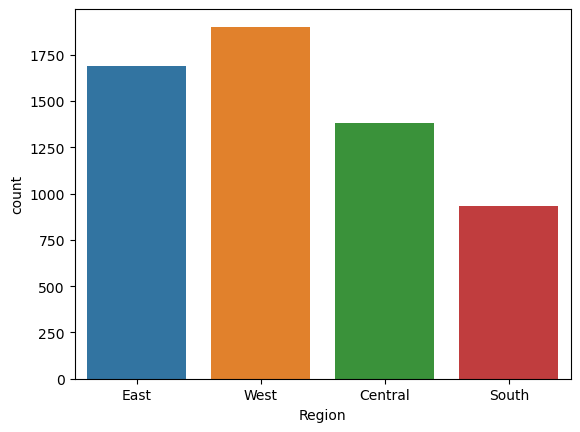

<======Category======>


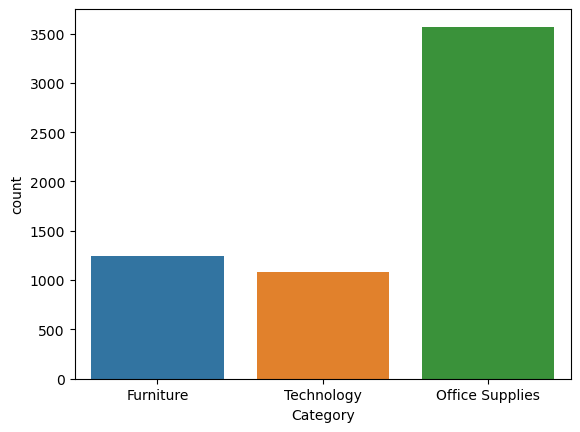

<======Payment Mode======>


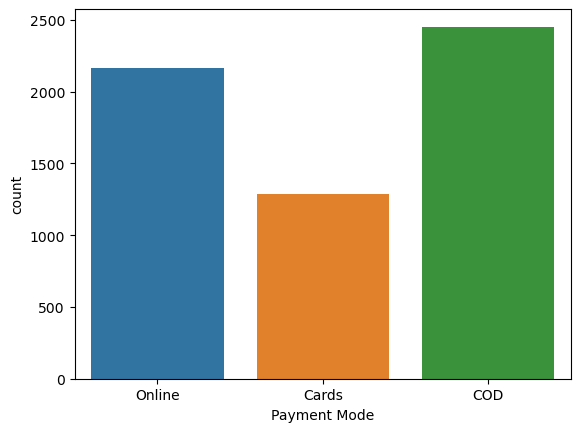

<======Order Quarter======>


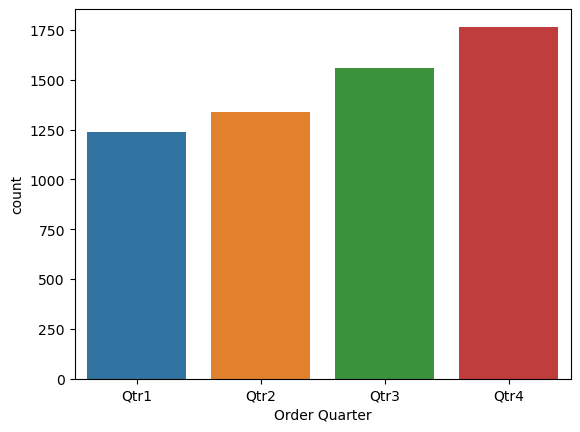

In [234]:
cont_cl = df[['Segment',"Ship Mode",'Region',"Category","Payment Mode","Order Quarter"]]
for i in cont_cl:
    print(f'<======{i}======>')
    sns.countplot(x=df[i])
    plt.show()

# Conclusion

# Continous Columns

In [235]:
con_cl = df.select_dtypes(include=["int", "float64"])
for h in con_cl.columns:
    print(f"<======{h}======>")
    print(df[h].describe())


<======Row ID+O6G3A1:R6======>
count    5901.000000
mean     5022.422471
std      2877.977184
min         1.000000
25%      2486.000000
50%      5091.000000
75%      7456.000000
max      9994.000000
Name: Row ID+O6G3A1:R6, dtype: float64
<======Sales======>
count    5901.000000
mean      265.345589
std       474.260645
min         0.836000
25%        71.976000
50%       128.648000
75%       265.170000
max      9099.930000
Name: Sales, dtype: float64
<======Quantity======>
count    5901.000000
mean        3.781901
std         2.212917
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64
<======Profit======>
count    5901.000000
mean       29.700408
std       259.589138
min     -6599.978000
25%         1.795500
50%         8.502500
75%        28.615000
max      8399.976000
Name: Profit, dtype: float64
<======Order Year======>
count    5901.000000
mean     2019.561430
std         0.496254
min      2019.0000

<=======Sales=======>


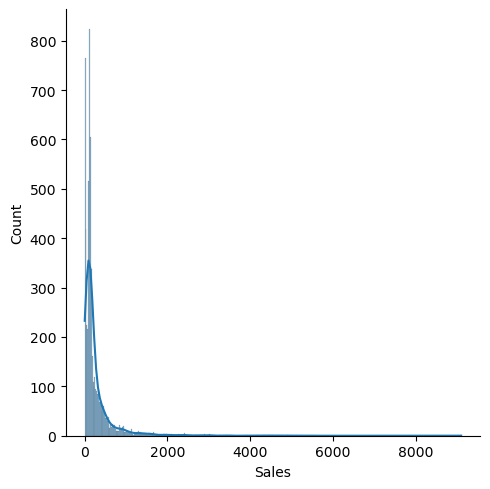

<=======Quantity=======>


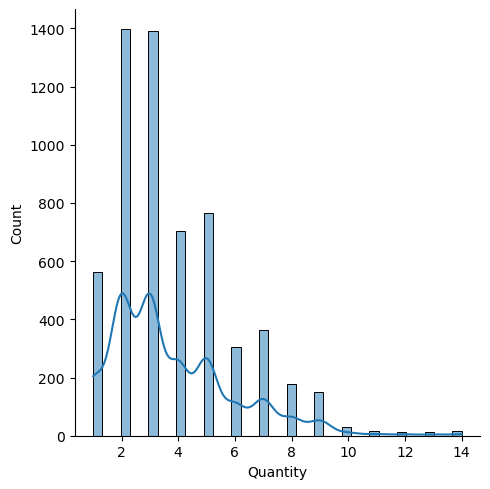

<=======Profit=======>


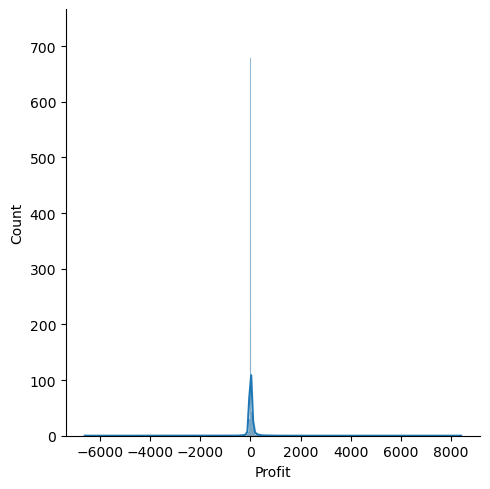

<=======Order Year=======>


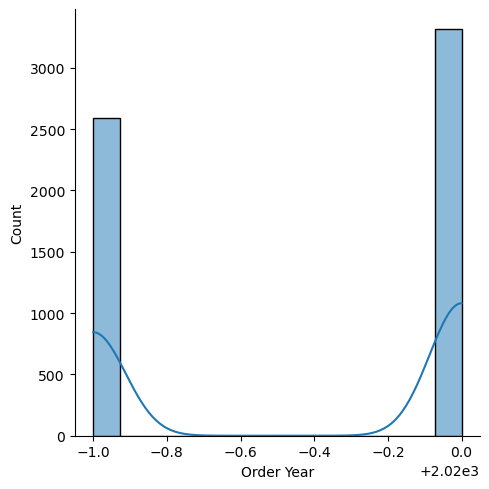

In [238]:
con_col = ["Sales", "Quantity", "Profit", "Order Year"]

for k in con_col:
    print(f"<======={k}=======>")
    sns.displot(df[k],kde=True)
    plt.show()


In [242]:
con_cl = df.select_dtypes(include=["int", "float64"])
con_cl.skew()

Row ID+O6G3A1:R6   -0.022714
Sales               5.949068
Quantity            1.216848
Profit              8.433694
Order Year         -0.247660
dtype: float64

<=====Row ID+O6G3A1:R6=====>


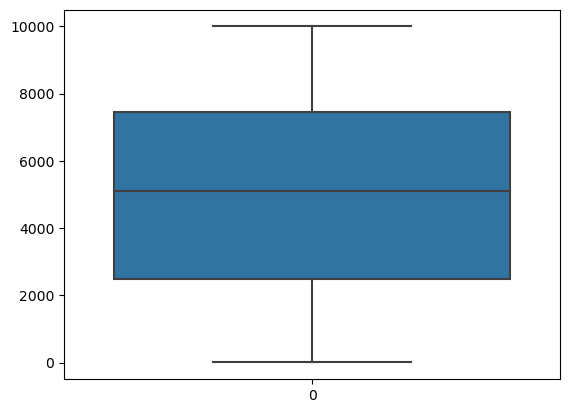

<=====Sales=====>


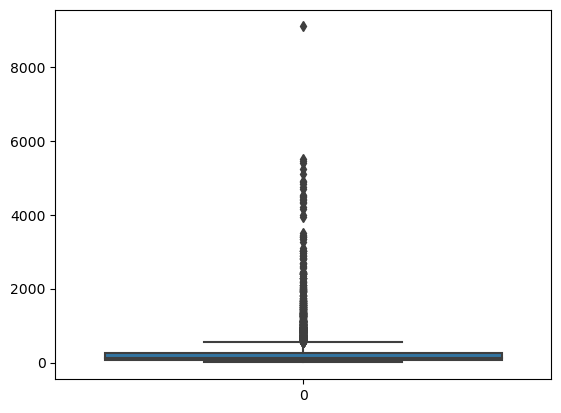

<=====Quantity=====>


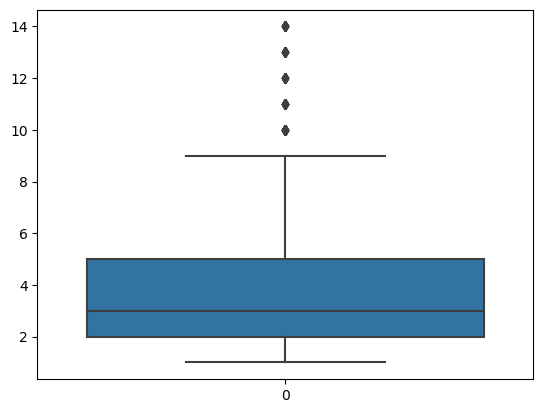

<=====Profit=====>


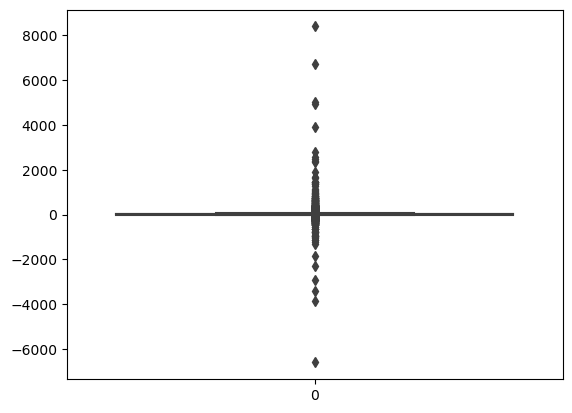

<=====Order Year=====>


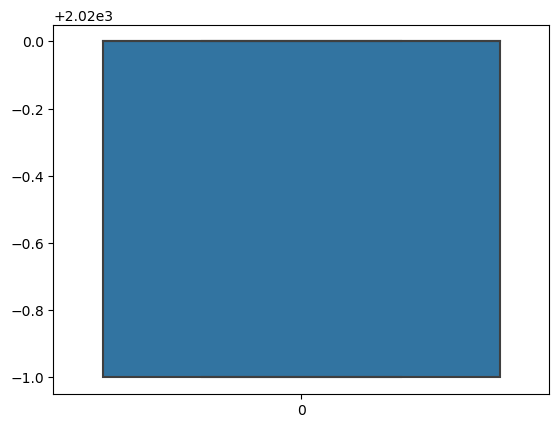

In [243]:
con_cl = df.select_dtypes(include=["int", "float64"])
for i in con_cl:
    print(f"<====={i}=====>")
    sns.boxplot(df[i])
    plt.show()

In [239]:
df.columns

Index(['Row ID+O6G3A1:R6', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Profit', 'Payment Mode', 'Order Month',
       'Order Quarter', 'Order Year'],
      dtype='object')

# Baiveriate Analysis

In [241]:
col =  df.groupby("Segment")["Sales"].count()

Segment
Consumer       2997
Corporate      1774
Home Office    1130
Name: Sales, dtype: int64

In [20]:
df.head()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Profit,Payment Mode,Order Month,Order Quarter,Order Year,Delivery Time
0,4918,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,Online,January,Qtr1,2019,6
1,4919,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,Online,February,Qtr1,2019,5
2,4920,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Phones,GE 30522EE2,231.98,2,67.2742,Cards,February,Qtr1,2019,5
3,3074,CA-2019-125206,2019-01-03,2019-01-05,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,Online,March,Qtr1,2019,2
4,8604,US-2019-116365,2019-01-03,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,Online,March,Qtr1,2019,5


In [19]:
df.to_csv("Super_Store_Analysis.csv",index=False)